## Import bibliotek

In [56]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

## Lista kodów produktów o których zostały pobrane

In [57]:
print(*[filename.split(".")[0] for filename in os.listdir("opinions")], sep="\n")

135823796


## Wczytwanie opinii o wskazanym produkcie

In [58]:
product_id = input("Podaj kod produktu z Ceneo.pl: ")
opinions = pd.read_json(f"opinions/{product_id}.json")
opinions.rating = opinions.rating.apply(lambda r : r.split("/")[0].replace(",",".")).astype(float)

## Podstawowe statystyki

In [59]:
opinions_count = opinions.shape[0]
pros_count = opinions.pros.astype(bool).sum()
cons_count = opinions.cons.astype(bool).sum()
average_rating = opinions.rating.mean()
average_rating

5.0

## Histogram ocen produktów

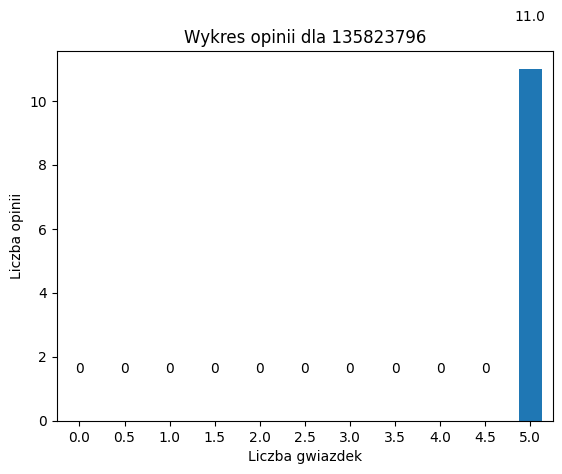

In [60]:
rating_distribution = opinions.rating.value_counts().reindex(np.arange(0,5.5,0.5))
rating_distribution.plot.bar()

plt.title(f"Wykres opinii dla {product_id}")
plt.xlabel("Liczba gwiazdek")
plt.ylabel("Liczba opinii")
plt.xticks(rotation=0)
for index, value in enumerate(rating_distribution):
    if np.isnan(value):
        value = 0

    plt.text(index, value + 1.5, str(value), ha = "center")

## Wykres udziału rekomendacji w opisach produktów

Text(0.5, 1.0, 'Udział rekomendacji w opiniach o 135823796')

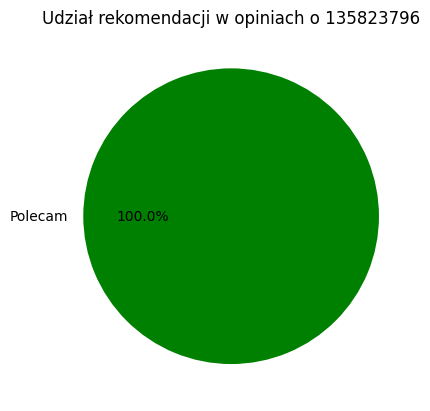

In [61]:
recommendation_distribution = opinions["recomendation"].value_counts(dropna=False).reindex(["Polecam", "Nie polecam", None])
recommendation_distribution.plot.pie(label = "", autopct = lambda r : f"{r:1.1f}%" if r>0 else"", labels = ["Polecam", "Nie polecam", "Brak zdania"], colors = ["green", "red", "grey"])
plt.title(f"Udział rekomendacji w opiniach o {product_id}")

In [62]:
stats = {
    "product_id" : product_id,
    "opinions_count" : opinions_count,
    "pros_count" : int(pros_count),
    "cons_count" : int(cons_count),
    "average_rating" : average_rating,
    "rating_distribution" : rating_distribution.to_dict(),
    "recommendation_distribution" : recommendation_distribution.to_dict()
}

In [63]:
if not os.path.exists("stats"):
    os.mkdir("stats")
with open (f"stats/{product_id}.json", "w", encoding="UTF-8") as jf:
    json.dump(stats, jf, indent = 4, ensure_ascii = False)


In [64]:
opinions

,author,recomendation,rating,content,pros,cons,opinion_date,purchase_date,likes,dislikes,opinion_id
0,m...z,Polecam,5.0,"Co tu oceniań, produkt absolutnie be zarzutu!","[dokładny touchpad, jakość, wydajność, wygląd,...","[mało portów, może mały dysk]",2023-01-26 20:12:02,NaN,1,0,17067606
1,a...i,Polecam,5.0,"Wiedziałem, że będzie dobrze ale jest jeszcze ...",[],[],2024-05-15 23:17:42,NaN,0,1,18651225
2,b...a,Polecam,5.0,idealny do pracy w biurze.,[],[],2024-04-01 12:05:03,NaN,0,0,18539334
3,l...a,Polecam,5.0,Polecam,[],[],2023-12-20 09:36:48,NaN,1,0,18228134
4,m...a,Polecam,5.0,Boski;-),"[jakość, wydajność, wygląd]",[],2022-12-16 14:15:39,NaN,0,0,16892070
5,k...i,Polecam,5.0,Polecam,[],[],2023-03-30 21:57:51,NaN,0,0,17343495
6,Tomasz,Polecam,5.0,Apple to Apple,"[jakość, wydajność, wygląd, wygodna klawiatura]",[],2023-01-27 20:41:38,NaN,0,1,17072961
7,a...k,Polecam,5.0,idealny :),"[dokładny touchpad, jakość, wydajność, wygląd,...","[mało portów, może mały dysk, przegrzewa sie]",2023-01-18 20:16:01,NaN,1,2,17033743
8,j...9,Polecam,5.0,SUPER!!!!!,"[jakość, mało portów, wydajność, wygląd, wygod...",[],2023-06-14 13:57:08,NaN,0,1,17610585
9,k...a,Polecam,5.0,Wspaniały,"[jakość, wydajność, wygląd, wygodna klawiatura]",[],2023-12-06 09:54:51,NaN,0,1,18177821
